In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Read both CSVs
df_true = pd.read_csv("True.csv", sep=',', engine='python', on_bad_lines='skip')
df_fake = pd.read_csv("Fake.csv", sep=',', engine='python', on_bad_lines='skip')

print(df_true.shape)
print(df_true.columns)
df_true.head()

(21417, 4)
Index(['title', 'text', 'subject', 'date'], dtype='object')


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [91]:
df_true['label'] = 1  # True news = 1
df_fake['label'] = 0  # Fake news = 0

df_combined = pd.concat([df_true, df_fake], ignore_index=True)
print("Combined dataset shape:", df_combined.shape)


Combined dataset shape: (44898, 5)


In [92]:
# Remove duplicates based on text
df_combined = df_combined.drop_duplicates(subset='text')
print("After dropping duplicates based on text:", df_combined.shape)

# Check most common entries if needed
print(df_combined['text'].value_counts().head(10))


After dropping duplicates based on text: (38646, 5)
text
21st Century Wire says It s not that far away. Guess who wants to run for president in 2020?Just before the New Year bell rung, the embattled Chicago Mayor Rahm Israel Emanuel (D) was forced to cut short his family vacation in Cuba, and headed back to the windy city after yet another embarrassing police shooting last week which claimed two lives as police responding to a  domestic disturbance  call killed  19-year-old Quintonio LeGrier, an engineering student at Northern Illinois University, and bystander 55-year-old Betti Jones, a grandmother.Last week, 100 people, family and activists, held a vigil for the victims. The Mayor has attempted a sort of mea culpa this time, but the public is not buying it, mainly because this was the second major high-profile police shooting incident to rock city hall in the last month. TROUBLE IN HIS KEEP: The LaQuan McDonald shooting has rattled the  dynasty potential  of Chicago s Rahm Emanuel.Cu

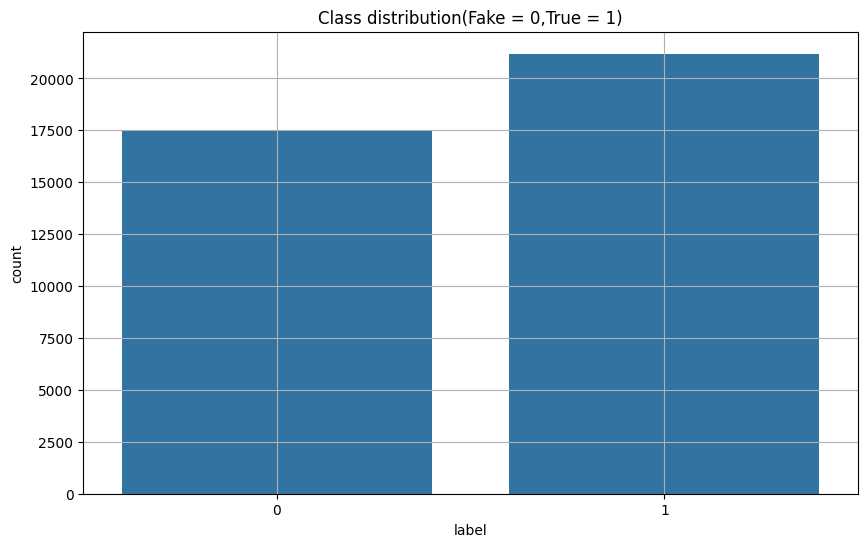

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df_combined)
plt.title("Class distribution(Fake = 0,True = 1)")
plt.grid(True)
plt.show()

In [94]:
df = df_combined.sample(frac=1).reset_index(drop=True)
df['content'] = df['title'] + " " + df['text']
X = df['content']
y = df['label']

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

# 📌 12. Make Predictions
y_pred = model.predict(X_test)

# 📌 13. Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9835705045278137

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3542
           1       0.98      0.99      0.98      4188

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



In [109]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9836
Naive Bayes Accuracy: 0.9387
Random Forest Accuracy: 0.9841


In [111]:
import joblib
best_model = models["Random Forest"]
joblib.dump(best_model, 'rf_model.pkl')

# Save the CountVectorizer or TF-IDF vectorizer used
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']